# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 - 

1. En ese caso el sistema tiene solución y es única.
2. En este caso  __p__ = 0 \.
3. En este caso hay que analizar (__1__) pues (__I-A__) no es inversible. Nos queda el sistema (__I-A__) __p__ = __d__ . Como (__I-A__) no es inversible, entonces el sistema no tiene solución o tiene infinitas soluciones.
4. En este caso tenemos el siguiente sistema homogéneo (__I-A__) __p__ = 0 . Como tenemos un homogéneo e (__I-A__) no es inversible , entonces el sistema tiene infinitas soluciones.

### Consigna 2 -  

In [1]:
import numpy as np
from funciones import *

### Consigna 3 -

Definimos los datos del ejercicio.

In [2]:
A = np.array([[0.3,0,0.1],[0.05,1.0,0.2],[0.1,0.15,0.1]])
d = np.array([100,100,300])
ImenosA = np.eye(np.shape(A)[0]) - A

Calculamos L, U, P y la matriz de Leontief:

In [3]:
L, U, P = calcularLU(ImenosA)
ML_inv = inversaLU(L,U,P)

Calculamos p:

In [4]:
p = ML_inv @ d
print(f'p = \n {p}')

p = 
 [   68.96551724 -5149.42528736  -517.24137931]


 Este resultado para la producción se debe a que en la matriz A, $a_{22}$ es 1, es decir se utiliza un 100% del producto 2 para producir este mismo producto, es por ello que en el vector de produccion la segunda coordenada es negativa, esto tambien explica porque sucede lo mismo en la tercera coordenada del vector,  ya que para producir el producto 3 se requiere un 15% de producto 2 y este fue utilizado en su totalidad para generarse a si mismo.

### Consigna 4 - 

Primero escribimos **(2)** con **p'** y **d'**.

$$
\mathbf{p}' = (I - A)^{-1} \mathbf{d}'
$$

$$
\mathbf{p}' = (I - A)^{-1} \left( \begin{bmatrix} d_1 \\ d_2 \\ d_3 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \right)
$$

Si distribuimos la matriz de **Leontief** nos queda:

$$
\mathbf{p}' = \mathbf{p} + (I - A)^{-1}  \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
$$

Luego...

$$
\Delta p = \mathbf{p}' - \mathbf{p}
$$

Finalmente:

$$
\Delta p = (I - A)^{-1} \Delta d
$$

### Consigna 5 - 

* Escribimos los datos del problema:

In [5]:

Z = np.array([[350,0,0],[50,250,150],[200,150,550]])
P_inv = np.array([[1/1000,0,0],[0,1/500,0],[0,0,1/1000]]) #P_inv_ij = 1/(P_ij), ya que P es una matriz diagonal.


* Calculamos los coeficientes tecnicos de la matriz **A**:

In [6]:
A = Z @ P_inv
print(f'A = \n {A}')

A = 
 [[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]


* Ahora calculamos la matriz de Leontief:

In [7]:
ImenosA = np.eye(3) - A
L, U, P = calcularLU(ImenosA)

ML = inversaLU(L,U,P)

print(f'Matriz de Leontief:\n {ML}')

#print(ImenosA @ ML) para chequear que vale.

Matriz de Leontief:
 [[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


### Consigna 6

Partimos de la ecuación **(4)**:

$$
\left(
\begin{pmatrix}
I_{n \times n} & 0_{n \times m} \\
0_{m \times n} & I_{m \times m}
\end{pmatrix} 
-
\begin{pmatrix}
A^{rr} & A^{rs} \\
A^{sr} & A^{ss}
\end{pmatrix}
\right)
\begin{pmatrix}
p^{r} \\
p^{s}
\end{pmatrix}
=
\begin{pmatrix}
d^{r} \\
d^{s}
\end{pmatrix}
$$

Si agregamos la variación de la producción en la región **r**, con la variación de demanda en **s** igual a 0, y realizamos la primera resta de matrices en el lado izquierdo, obtenemos:

$$
\left(
\begin{pmatrix}
I_{n \times n} - A^{rr} & -A^{rs} \\
-A^{sr} & I_{m \times m} - A^{ss}
\end{pmatrix}
\right)
\begin{pmatrix}
p^{r} + \Delta p^{r} \\
p^{s} + \Delta p^{s}
\end{pmatrix}
=
\begin{pmatrix}
d^{r} + \Delta d^{r} \\
d^{s}
\end{pmatrix}
$$

De aquí, podemos extraer dos ecuaciones clave:

$$
\begin{gather}
(I - A^{rr}) \Delta p^{r} - A^{rs} \Delta p^{s} = \Delta d^{r} \\
-A^{sr} \Delta p^{r} + (I - A^{ss}) \Delta p^{s} = 0
\end{gather}
$$

Dado que solo se consideran las variaciones en la demanda, estas deben igualarse a las nuevas variaciones en la producción. Luego, de **(2)**:

$$
\implies (I - A^{ss}) \Delta p^{s} = A^{sr} \Delta p^{r}
$$

lo que implica que:

$$
\Leftrightarrow \Delta p^{s} = (I - A^{ss})^{-1} A^{sr} \Delta p^{r}
$$

Sustituyendo en **(1)**:

$$
(I - A^{rr}) \Delta p^{r} - A^{rs} (I - A^{ss})^{-1} A^{sr} \Delta p^{r} = \Delta d^{r}
$$

$$
\implies \left( (I - A^{rr}) - A^{rs} (I - A^{ss})^{-1} A^{sr} \right) \Delta p^{r} = \Delta d^{r}
$$

Por lo tanto:

$$
\Delta p^{r} = \left( (I - A^{rr}) - A^{rs} (I - A^{ss})^{-1} A^{sr} \right)^{-1} \Delta d^{r}
$$


### Consigna 7

* Importamos pandas y descargamos los datos.

In [8]:
import pandas as pd

nombreFile = "matrizlatina2011_compressed_0.xlsx"
archivo = pd.read_excel(nombreFile, sheet_name=1)

* Seleccionamos los paises y generamos las matrices insumo producto de las regiones:

In [9]:
p1="SLV"
p2="PAN"

<h1><u>Matrices intra-regionales:</u></h1>

1. Panamá 

In [10]:
panama = archivo[archivo["Country_iso3"]==p2] #seleccionamos las filas de Panamá

iPP= panama.filter(regex='^PAN', axis=1) #seleccionamos las columas de Panamá

outputP=panama["Output"] #Output es el total producido

output01P= outputP.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

2. El Salvador

In [11]:
salvador = archivo[archivo["Country_iso3"]==p1] #seleccionamos las filas de El Salvador


iSS= salvador.filter(regex='^SLV', axis=1) #seleccionamos las columas de El Salvador

outputS = salvador["Output"] #Output es el total producido

output01S=outputS.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

<h1><u>Matrices inter-regionales:</u></h1>

1. Panamá-Salvador

In [12]:
iPS= panama.filter(regex='^SLV', axis=1) #de la matriz generada por la selección de filas de Panamá, seleccionamos las columnas de El Salvador.

2. Salvador-Panamá

In [13]:
iSP= salvador.filter(regex='^PAN', axis=1) #de la matriz generada por la selección de filas de El Salvador, seleccionamos las columnas de Panamá.

<h1><u>Coeficientes técnicos</u></h1>

Primero definimos una funcion para calcularlos de una forma mas eficiente.

In [14]:
def coeficientesTecnicos(Z,P):
    """Recibe la matriz de flujo de capitales y en vector produccion. Devuelve la matriz de coeficientes tecnicos asociada"""
    P= np.diag(P)
    L, U, Per = calcularLU(P)
    P_inv = inversaLU(L, U, Per)
    A =Z@P_inv
    
    return  A

Ahora realizamos los calculos:

In [15]:
APP = coeficientesTecnicos(iPP, output01P)

ASP=coeficientesTecnicos(iSP, output01P)

ASS= coeficientesTecnicos(iSS, output01S) 

APS= coeficientesTecnicos(iPS, output01S)

<h1><u>Simulación de shock de demanda</u></h1>

Para generar el shock primero debemos calcular la demanda, para ello utilizamos ec __(4)__.

In [16]:
def demandaCalculator(RR,RS,SR,SS,pR,pS):
    """Recibe las matrices de insumo-producto de cada region y los vectores de produccion de estas. Devuelve la demanda de cada una usando la ecuacion (4) """
    tamañoIdentidad=np.shape(RR)[0] + np.shape(SS)[1]
    
    identidadSuper= np.eye(tamañoIdentidad)
    
    up = np.hstack((RR,RS))
    
    down = np.hstack((SR,SS))
    
    ASuper= np.vstack((up,down))
    
    restaSuper = identidadSuper - ASuper
    
    productoSuper = np.hstack((pR,pS))
    
    demandaSuper= restaSuper @ productoSuper
    
    #######SEPARAMOS LAS DEMANDAS R,S ##########
    
    demandatamaño=np.shape(demandaSuper)[0]
    
    dR= demandaSuper[0:int(demandatamaño/2)]
    
    dS= demandaSuper[int(demandatamaño/2):demandatamaño]

    return dR, dS

Utilizamos la función para calcular la demanda:

In [17]:
dP,dS=demandaCalculator(APP, APS, ASP, ASS, outputP, outputS)

Ahora generamos el shock:

In [18]:
def deltaD_generator(demanda, shocks):
    """Recibe un vector demanda y un vector shocks. Devuelve la diferencia entre la demanda original y la nueva generada por los shocks"""
    demandaPrima = demanda.copy()
    for i in range(len(shocks)):
        demandaPrima[shocks[i][0]-1] = demanda[shocks[i][0]-1] + demanda[shocks[i][0]-1] * shocks[i][1]
        
    deltaD = demanda - demandaPrima
    return deltaD

shocks = [[5,-0.1],[6,0.33],[7,0.33],[8,0.33]]

deltaD = deltaD_generator(dP, shocks)

<h1><u>Modelo de región simple vs Fórmula completa</u></h1>

1. Primero hacemos los cálculos para el modelo de región simple.

$$
\Delta p^{r} = (I - A^{rr})^{-1} \Delta d^{r}
$$

In [19]:
ImenosAPP = np.eye(np.shape(APP)[0]) - APP
ImenosAPP_arr = ImenosAPP.to_numpy() #pasamos a array asi podemos utilizar las funciones definidas en funciones.py.

L1, U1, Per1 = calcularLU(ImenosAPP_arr)
ML = inversaLU(L1,U1,Per1)
    
deltaPp_simple = ML @ deltaD

2. Ahora hacemos los cálculos usando la fórmula completa

$$
\Delta p^{r} = ((I-A^{rr}) - A^{rs} (I-A^{ss})^{-1} A^{sr})^{-1} \Delta d^{r}
$$

In [20]:
#pasamos todos los dataframes que aparecen en la fórmula a matrices de numpy:
    
ImenosASS = np.eye(np.shape(ASS)[0]) - ASS
ImenosASS_arr = ImenosASS.to_numpy()

APS_arr = APS.to_numpy()

ASP_arr = ASP.to_numpy()

#calculos previos:

L, U, Per = calcularLU(ImenosASS_arr)    
ML_ASS = inversaLU(L,U,Per)

granTermino = ImenosAPP_arr - APS_arr @ ML_ASS @ ASP_arr

L, U, Per = calcularLU(granTermino)
granTermino_inv = inversaLU(L,U,Per)

#calculo final:

deltaPp_completa = granTermino_inv @ deltaD

3. Finalemente hacemos un gráfico para comparar los resultados.

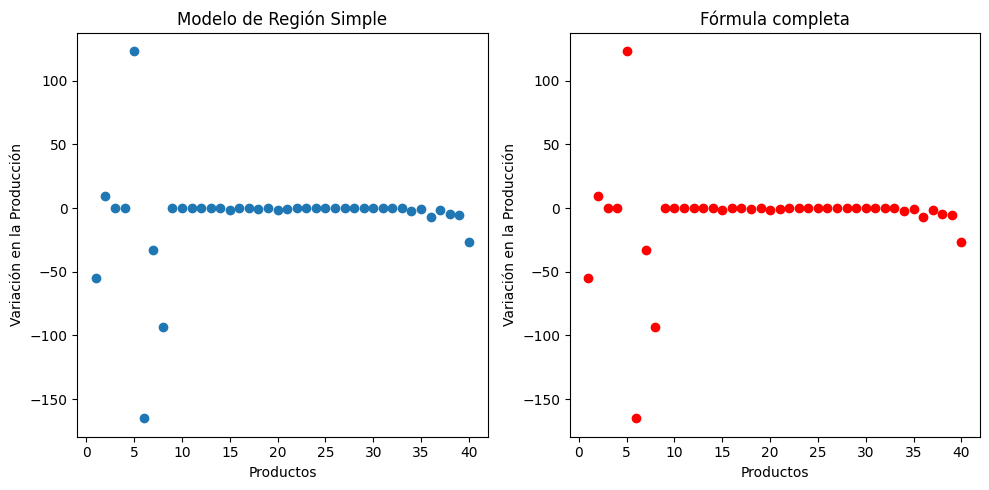

In [21]:
import matplotlib.pyplot as plt


x = np.arange(1,41)

fig, (DeltaP_simple, DeltaP_completa) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1
DeltaP_simple.scatter(x, deltaPp_simple)
DeltaP_simple.set_xlabel('Productos')
DeltaP_simple.set_ylabel('Variación en la Producción')
DeltaP_simple.set_title('Modelo de Región Simple')

# Gráfico 2
DeltaP_completa.scatter(x, deltaPp_completa, color = 'red')
DeltaP_completa.set_xlabel('Productos')
DeltaP_completa.set_ylabel('Variación en la Producción')
DeltaP_completa.set_title('Fórmula completa')




plt.tight_layout()

plt.show()

Como se observa en el gráfico no hay una variacion notoria en los resultados de $\Delta p^{r}$.


El termino que difiere entre la formula simple y la completa es:$- A^{rs} (I-A^{ss})^{-1} A^{sr}$.
Calculando solo esta parte, observamos que los valores de la matriz resultante son cercanos a 0. Por lo tanto, tener en cuenta este termino no afecta al resultado de la variacion de la producción. 
Creemos que esto se debe a que los insumos seleccionados no son materia relevante en el comercio entre estos 2 paises, con lo cual la variacion de la produccion, a partir de un shock de la demanda de estos productos, no se ve afectada significativamente entre las dos formulas. 



In [22]:
print("Delta p completa --->",deltaPp_completa)

print("Delta p simple --->",deltaPp_simple)

Delta p completa ---> [-5.50683913e+01  9.60278551e+00  0.00000000e+00 -3.68450470e-01
  1.23041770e+02 -1.65064071e+02 -3.32419648e+01 -9.36076543e+01
 -3.27867890e-01  0.00000000e+00 -1.63211150e-06 -5.47691213e-02
 -4.54053735e-09 -3.15984901e-02 -1.28395011e+00 -4.12196336e-05
 -1.83545445e-06 -7.87860599e-01 -1.65856614e-02 -1.47461331e+00
 -4.80047949e-01 -1.15325748e-02 -2.87978549e-07 -6.68652090e-07
 -1.02629843e-06  0.00000000e+00 -7.32447132e-08  0.00000000e+00
 -1.55345325e-08  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.75594006e-01 -2.49149215e+00 -7.95468581e-01 -6.88119704e+00
 -1.34075813e+00 -4.76997199e+00 -5.47166361e+00 -2.69279068e+01]
Delta p simple ---> [-5.50683892e+01  9.60278599e+00  0.00000000e+00 -3.68449126e-01
  1.23041775e+02 -1.65064071e+02 -3.32419646e+01 -9.36076538e+01
 -3.27867601e-01  0.00000000e+00  0.00000000e+00 -5.47688676e-02
  0.00000000e+00 -3.15982899e-02 -1.28388271e+00  0.00000000e+00
  0.00000000e+00 -7.87830252e-01 -1.65854892e-0